In [1]:
import pandas as pd
import numpy as np

In [3]:
df_portfolio_1 = pd.read_csv("sentiment_scores_finbert_portfolio_1.csv", sep='|', encoding='UTF-8')
df_portfolio_2 = pd.read_csv("sentiment_scores_finbert_portfolio_2.csv", sep='|', encoding='UTF-8')
df_portfolio_3 = pd.read_csv("sentiment_scores_finbert_portfolio_3.csv", sep='|', encoding='UTF-8')
df_24hu = pd.read_csv("sentiment_scores_finbert_24hu.csv", sep='|', encoding='UTF-8')
df_index = pd.read_csv("sentiment_scores_finbert_index.csv", sep='|', encoding='UTF-8')

In [4]:
df = pd.concat([df_portfolio_1, df_portfolio_2,df_portfolio_3,df_24hu,df_index], axis=0)

In [5]:
df = df[df['date'] != 'Date not found']

In [6]:
df.reset_index(drop=True, inplace=True)

In [5]:
df["date"] = pd.to_datetime(df["date"]) 

In [8]:
df = df[(df['date'] >= "2018-02-01") & (df['date'] <= "2025-01-01")]

In [21]:
df.to_csv("sentiment_scores_finbert_final.csv", sep="|", encoding='utf-8', index=False)

In [2]:
df = pd.read_csv("sentiment_scores_finbert_final.csv", sep='|', encoding='UTF-8')

In [10]:
df.groupby("date")["sentiment_score"].agg(["mean", "count", "std"])

,mean,count,std
date,,,
2018-02-01,-0.266948,22,0.535288
2018-02-02,-0.239291,29,0.442651
2018-02-03,0.057259,8,0.293911
2018-02-04,-0.417711,4,0.527839
2018-02-05,-0.168152,26,0.516326
...,...,...,...
2024-12-28,-0.224541,14,0.363573
2024-12-29,-0.308250,8,0.462518
2024-12-30,-0.062153,44,0.444430


In [11]:
df.groupby("date")["sentiment_score"].agg(["mean", "count"]).groupby("count").count()

,mean
count,
1,1
2,5
3,10
4,13
5,18
...,...
107,2
108,1
109,2


In [13]:
df = df[(df['date'] >= '2018.01.01') & (df['date'] < '2025.01.01')]

In [20]:
df = df.sort_values(by='date')

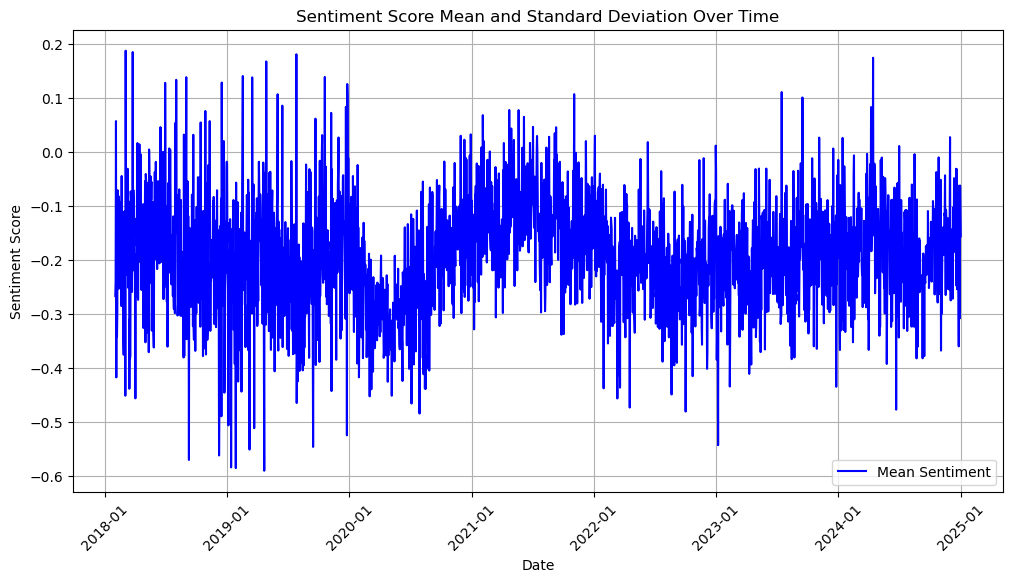

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Aggregating sentiment scores by date
df_grouped = df.groupby("date")["sentiment_score"].agg(["mean", "std"])

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the mean sentiment score
ax.plot(df_grouped.index, df_grouped["mean"], label="Mean Sentiment", color="blue")

# Formatting the x-axis labels
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically choose a reasonable date interval
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  # Show only Year-Month format
plt.xticks(rotation=45)  # Rotate labels for better visibility

# Additional plot formatting
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Score Mean and Standard Deviation Over Time")
plt.legend()
plt.grid()

# Show the plot
plt.show()


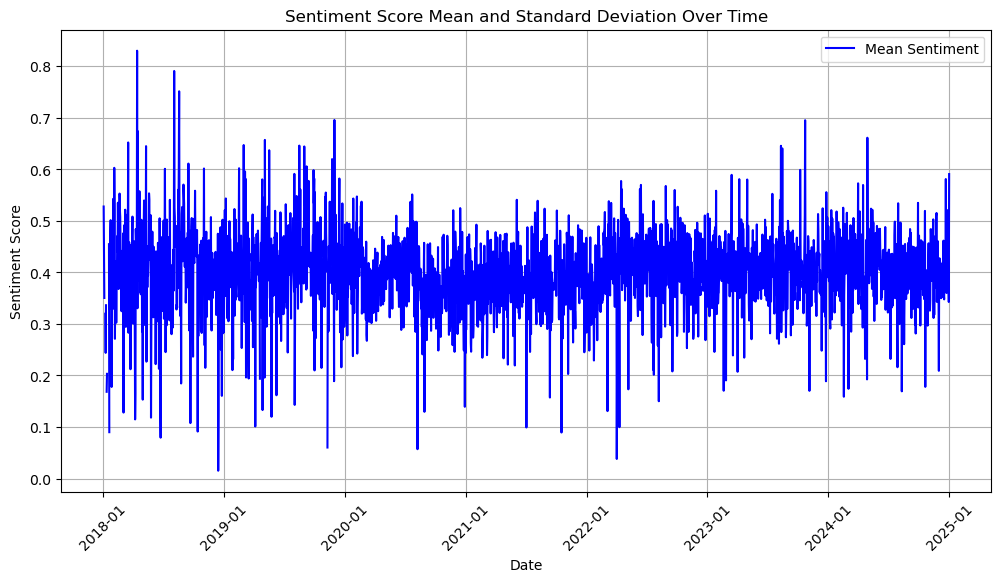

In [51]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the mean sentiment score
ax.plot(df_grouped.index, df_grouped["std"], label="Mean Sentiment", color="blue")

# Formatting the x-axis labels
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically choose a reasonable date interval
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  # Show only Year-Month format
plt.xticks(rotation=45)  # Rotate labels for better visibility

# Additional plot formatting
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Score Mean and Standard Deviation Over Time")
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [37]:
df['weekday'] = df['date'].dt.day_name()

C:\Users\tothk\AppData\Local\Temp\ipykernel_14108\19031668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df['date'].dt.day_name()


In [47]:
import pandas as pd

# Define correct weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group, aggregate, round, and convert types
summary = df.groupby('weekday')['sentiment_score'].agg(['count', 'mean', 'std'])
summary['mean'] = summary['mean'].round(3)
summary['std'] = summary['std'].round(3)
summary['count'] = summary['count'].astype(int)

# Reindex to get the correct order
summary = summary.reindex(weekday_order)

summary

,count,mean,std
weekday,,,
Monday,16970,-0.208,0.444
Tuesday,17589,-0.192,0.441
Wednesday,17326,-0.195,0.434
Thursday,17274,-0.190,0.437
Friday,15266,-0.188,0.444
Saturday,6528,-0.191,0.389
Sunday,6144,-0.208,0.389


In [48]:
import calendar

# Define correct month order
month_order = list(calendar.month_name)[1:]  # Skips the empty string at index 0

# Group, aggregate, round, and convert types
summary = df.groupby(df['date'].dt.month_name())['sentiment_score'].agg(['count', 'mean', 'std'])
summary['mean'] = summary['mean'].round(3)
summary['std'] = summary['std'].round(3)
summary['count'] = summary['count'].astype(int)

# Reindex to get the correct month order
summary = summary.reindex(month_order)

summary

,count,mean,std
date,,,
January,6607,-0.188,0.440
February,6822,-0.185,0.438
March,8896,-0.213,0.428
April,8505,-0.207,0.437
May,9578,-0.196,0.441
June,8739,-0.190,0.432
July,7486,-0.204,0.436
August,7030,-0.233,0.437
September,8116,-0.199,0.436


In [49]:
summary = df.groupby(df['date'].dt.year)['sentiment_score'].agg(['count', 'mean', 'std'])
summary['mean'] = summary['mean'].round(3)
summary['std'] = summary['std'].round(3)
summary['count'] = summary['count'].astype(int)

# Sort by year (just to be safe)
summary = summary.sort_index()

summary

,count,mean,std
date,,,
2018,8400,-0.187,0.438
2019,10079,-0.200,0.444
2020,16612,-0.251,0.419
2021,16001,-0.126,0.419
2022,16286,-0.211,0.444
2023,15396,-0.204,0.435
2024,14323,-0.183,0.433


In [13]:
df_grouped.to_csv("agg_sentiment_score_finbert.csv", sep="|", encoding='utf-8')

In [7]:
df

,translated_content,date,sentiment_score
0,The government's decision regarding guest work...,2024-12-24,-0.251766
1,A Tesla exploded in front of Trump's hotel - O...,2025-01-01,-0.533167
2,Comprehensive investments are starting in thre...,2025-01-01,0.127709
3,"On January 1st, Russia attacked Kyiv, killing ...",2025-01-01,-0.319368
4,Russia has stopped delivering natural gas to E...,2025-01-01,-0.317708
...,...,...,...
97109,Tesco Acknowledges Layoffs. In a statement rel...,2018-02-01,-0.828892
97110,Suppliers are being sought with a tight deadli...,2018-02-01,-0.583412
97111,A bakery in Budapest was making dough with a d...,2018-02-01,-0.951487
97112,"In a few weeks, it will be easier to apply for...",2018-02-01,0.094113


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Magyar elnevezések
magyar_hetnapok = ['Hétfő', 'Kedd', 'Szerda', 'Csütörtök', 'Péntek', 'Szombat', 'Vasárnap']
magyar_hónapok = ['Január', 'Február', 'Március', 'Április', 'Május', 'Június',
                  'Július', 'Augusztus', 'Szeptember', 'Október', 'November', 'December']

# Hét napja szerint
df['weekday'] = df['date'].dt.dayofweek
weekday_raw = df.groupby('weekday')['sentiment_score'].agg(['count', 'mean', 'std'])
weekday_stats = pd.DataFrame({
    'Darabszám': weekday_raw['count'].astype(int),
    'Átlag': weekday_raw['mean'].round(3),
    'Szórás': weekday_raw['std'].round(3)
})
weekday_stats.index = magyar_hetnapok

# Hónap szerint
df['month'] = df['date'].dt.month
month_raw = df.groupby('month')['sentiment_score'].agg(['count', 'mean', 'std'])
month_stats = pd.DataFrame({
    'Darabszám': month_raw['count'].astype(int),
    'Átlag': month_raw['mean'].round(3),
    'Szórás': month_raw['std'].round(3)
})
month_stats.index = magyar_hónapok

# Év szerint
year_raw = df.groupby(df['date'].dt.year)['sentiment_score'].agg(['count', 'mean', 'std'])
year_stats = pd.DataFrame({
    'Darabszám': year_raw['count'].astype(int),
    'Átlag': year_raw['mean'].round(3),
    'Szórás': year_raw['std'].round(3)
})
year_stats.index = year_stats.index.astype(str)

# Táblázat rajzoló függvény
def render_mpl_table(data, filename, col_width=3.0, row_height=0.6, font_size=13,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * [col_width, row_height]
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns,
                         rowLabels=data.index, cellLoc='center', loc='center', **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0] % len(row_colors)])

    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.close()

# Mentés képként
render_mpl_table(weekday_stats, filename='hangulat_hetnapjai.png')
render_mpl_table(month_stats, filename='hangulat_honapok.png')
render_mpl_table(year_stats, filename='hangulat_evek.png')


C:\Users\tothk\AppData\Local\Temp\ipykernel_14108\1016256948.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df['date'].dt.dayofweek
C:\Users\tothk\AppData\Local\Temp\ipykernel_14108\1016256948.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month


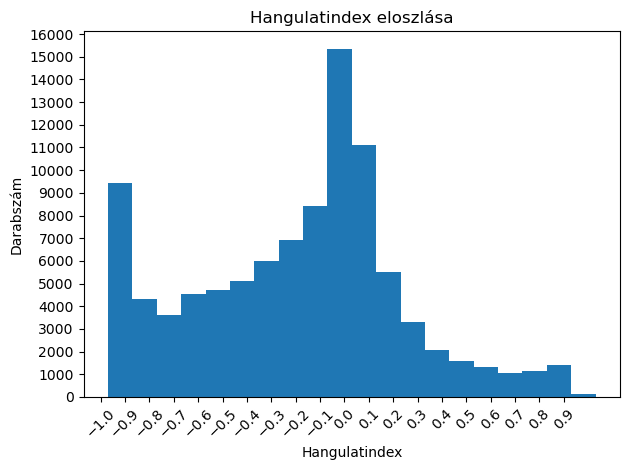

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Bin-határok 0.1-es lépésközzel
bins = np.arange(df['sentiment_score'].min(), df['sentiment_score'].max() + 0.1, 0.1)

# Hisztogram
df['sentiment_score'].hist(bins=bins)

# X tengely: 0.1-es osztásköz, feliratok forgatva
xticks = np.arange(round(df['sentiment_score'].min(), 1), round(df['sentiment_score'].max(), 1) + 0.1, 0.1)
plt.xticks(xticks, rotation=45)

# Y tengely: ezres osztásköz
yticks = np.arange(0, 17000, 1000)
plt.yticks(yticks)
plt.grid(False)
plt.xlabel('Hangulatindex')
plt.ylabel('Darabszám')
plt.title('Hangulatindex eloszlása')
plt.tight_layout()
plt.show()


In [22]:
df

,translated_content,date,sentiment_score,weekday,month
0,The government's decision regarding guest work...,2024-12-24,-0.251766,1,12
14,American oil production has hit a record high....,2024-12-31,0.505470,1,12
15,"Ford is recalling 20,000 cars in America. Ford...",2024-12-31,-0.906553,1,12
16,There will be no gas shortage after Ukrainian ...,2024-12-31,-0.422373,1,12
17,Israel's population is growing rapidly. The po...,2024-12-31,-0.950189,1,12
...,...,...,...,...,...
97109,Tesco Acknowledges Layoffs. In a statement rel...,2018-02-01,-0.828892,3,2
97110,Suppliers are being sought with a tight deadli...,2018-02-01,-0.583412,3,2
97111,A bakery in Budapest was making dough with a d...,2018-02-01,-0.951487,3,2
97112,"In a few weeks, it will be easier to apply for...",2018-02-01,0.094113,3,2


In [23]:
daily_sentiment = df.groupby(df['date'].dt.date)['sentiment_score'].mean()

# Legpozitívabb és legnegatívabb nap
max_day = daily_sentiment.idxmax()
min_day = daily_sentiment.idxmin()

print(f"Legpozitívabb nap: {max_day} — Átlagos hangulatindex: {daily_sentiment[max_day]:.3f}")
print(f"Legnegatívabb nap: {min_day} — Átlagos hangulatindex: {daily_sentiment[min_day]:.3f}")

📈 Legpozitívabb nap: 2018-03-04 — Átlagos hangulatindex: 0.188
📉 Legnegatívabb nap: 2019-04-22 — Átlagos hangulatindex: -0.591


<AxesSubplot: >

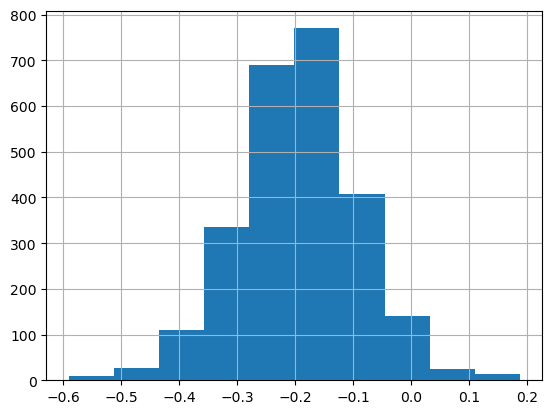

In [25]:
daily_sentiment.hist()

In [28]:
# Szűrés dátum alapján
max_day_articles = df[df['date'].dt.date == max_day]
min_day_articles = df[df['date'].dt.date == min_day]

# Csak a fontos mezőket listázzuk ki
print("🟢 Legpozitívabb nap cikkei:")
print(max_day_articles[['date', 'translated_content', 'sentiment_score']].sort_values(by='sentiment_score', ascending=False))

print("\n🔴 Legnegatívabb nap cikkei:")
print(min_day_articles[['date', 'translated_content', 'sentiment_score']].sort_values(by='sentiment_score'))

max_day_articles.to_excel('legpozitívabb_nap_cikkei.xlsx', index=False)
min_day_articles.to_excel('legnegatívabb_nap_cikkei.xlsx', index=False)

🟢 Legpozitívabb nap cikkei:
            date                                 translated_content  \
96858 2018-03-04  Gazprom keeps breaking records. According to M...   
55676 2018-03-04  South Korea is sending its intelligence agency...   
71435 2018-03-04  Hungary's sovereign debt rating will be review...   
71434 2018-03-04  In the shadow of the Diósgyőr housing estate, ...   
55674 2018-03-04  The last obstacle has been removed for Merkel ...   
55675 2018-03-04  The head of the NAV (National Tax and Customs ...   

       sentiment_score  
96858         0.932522  
55676         0.242996  
71435         0.066470  
71434         0.000577  
55674        -0.019900  
55675        -0.095988  

🔴 Legnegatívabb nap cikkei:
            date                                 translated_content  \
50219 2019-04-22  The harsh consequence of Brexit: Foreign worke...   
50216 2019-04-22  There is a big traffic jam at Hegyeshalom befo...   
50217 2019-04-22  Even American retirees are being forced

In [29]:
from scipy.stats import shapiro

stat, p = shapiro(daily_sentiment)
print(f"Shapiro–Wilk statisztika: {stat:.3f}, p-érték: {p:.5f}")


Shapiro–Wilk statisztika: 0.995, p-érték: 0.00000


In [30]:
daily_sentiment

date
2018-02-01   -0.266948
2018-02-02   -0.239291
2018-02-03    0.057259
2018-02-04   -0.417711
2018-02-05   -0.168152
                ...   
2024-12-27   -0.062470
2024-12-28   -0.224541
2024-12-29   -0.308250
2024-12-30   -0.062153
2024-12-31   -0.110772
Name: sentiment_score, Length: 2525, dtype: float64

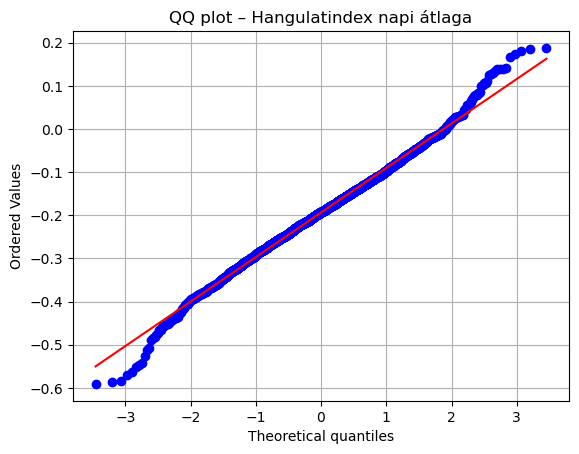

In [31]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(daily_sentiment, dist="norm", plot=plt)
plt.title("QQ plot – Hangulatindex napi átlaga")
plt.grid()
plt.show()

In [32]:
from scipy.stats import kstest, norm

# Standardizáljuk az adatokat
stat, p = kstest(daily_sentiment, 'norm')
print(f"Kolmogorov–Smirnov statisztika: {stat:.3f}, p-érték: {p:.5f}")

Kolmogorov–Smirnov statisztika: 0.472, p-érték: 0.00000


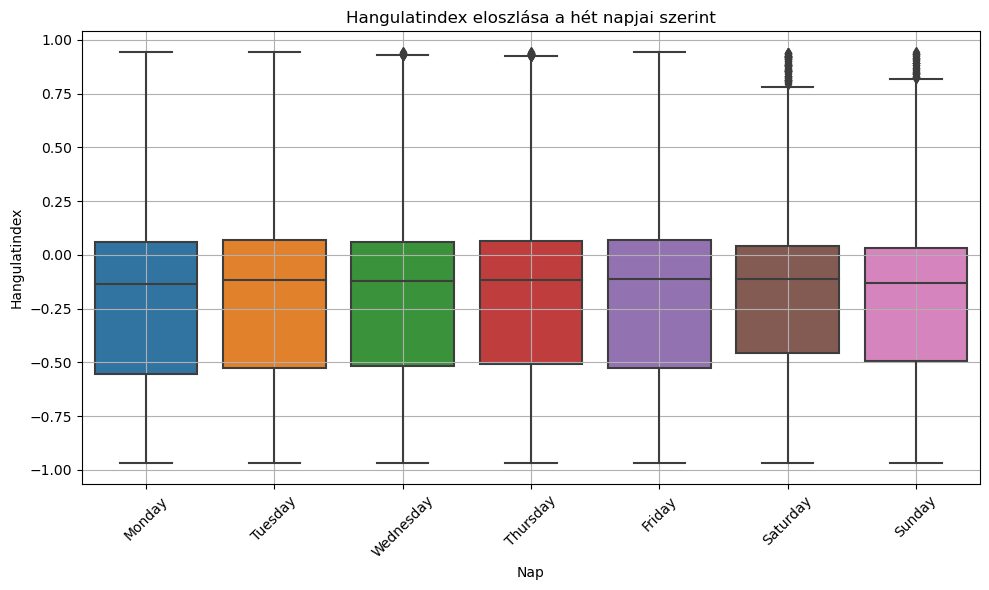

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='weekday', y='sentiment_score', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Hangulatindex eloszlása a hét napjai szerint')
plt.xlabel('Nap')
plt.ylabel('Hangulatindex')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
df

,translated_content,date,sentiment_score,weekday,month
0,The government's decision regarding guest work...,2024-12-24,-0.251766,Tuesday,12
14,American oil production has hit a record high....,2024-12-31,0.505470,Tuesday,12
15,"Ford is recalling 20,000 cars in America. Ford...",2024-12-31,-0.906553,Tuesday,12
16,There will be no gas shortage after Ukrainian ...,2024-12-31,-0.422373,Tuesday,12
17,Israel's population is growing rapidly. The po...,2024-12-31,-0.950189,Tuesday,12
...,...,...,...,...,...
97109,Tesco Acknowledges Layoffs. In a statement rel...,2018-02-01,-0.828892,Thursday,2
97110,Suppliers are being sought with a tight deadli...,2018-02-01,-0.583412,Thursday,2
97111,A bakery in Budapest was making dough with a d...,2018-02-01,-0.951487,Thursday,2
97112,"In a few weeks, it will be easier to apply for...",2018-02-01,0.094113,Thursday,2


C:\Users\tothk\AppData\Local\Temp\ipykernel_14108\4192639881.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_name'] = df['month'].apply(lambda x: calendar.month_name[x])


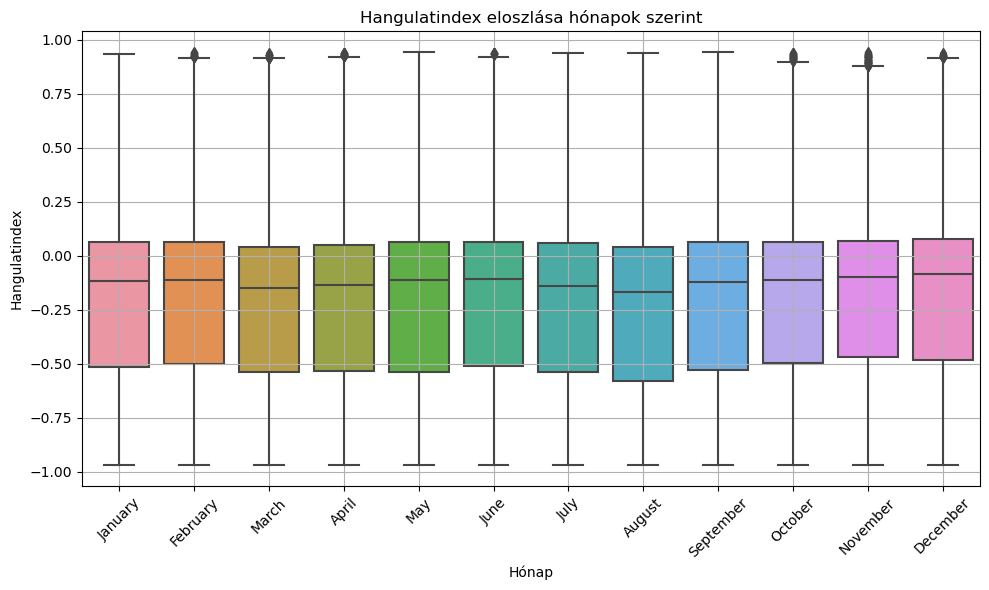

In [41]:
import calendar


df['month_name'] = df['month'].apply(lambda x: calendar.month_name[x])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='month_name', y='sentiment_score', order=calendar.month_name[1:])
plt.title('Hangulatindex eloszlása hónapok szerint')
plt.xlabel('Hónap')
plt.ylabel('Hangulatindex')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\tothk\AppData\Local\Temp\ipykernel_14108\1691948615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year


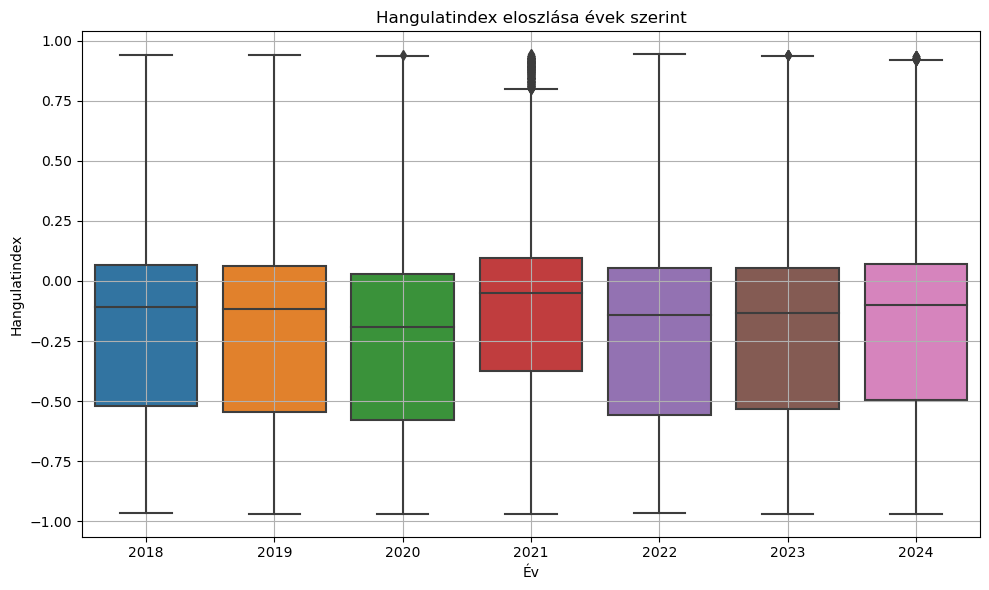

In [43]:
df['year'] = df['date'].dt.year

# Boxplot készítése
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='sentiment_score')
plt.title('Hangulatindex eloszlása évek szerint')
plt.xlabel('Év')
plt.ylabel('Hangulatindex')
plt.grid(True)
plt.tight_layout()
plt.show()

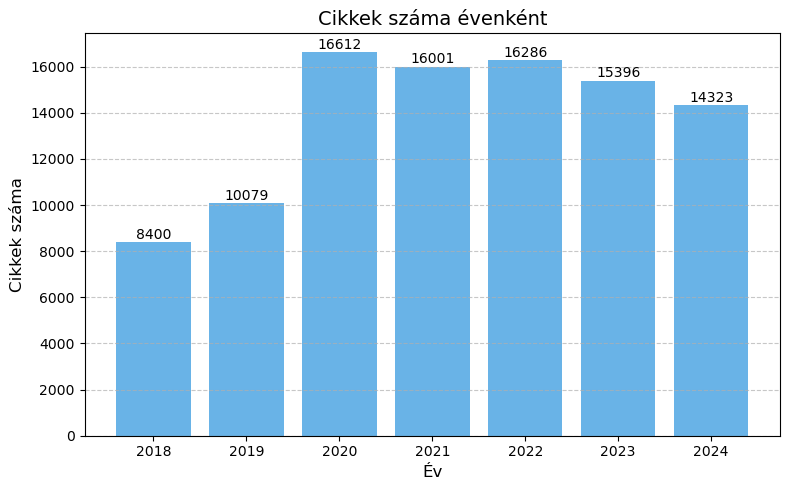

In [45]:
import matplotlib.pyplot as plt

# Cikkek száma évenként
yearly_counts = df['date'].dt.year.value_counts().sort_index()

plt.figure(figsize=(8, 5))
bars = plt.bar(yearly_counts.index.astype(str), yearly_counts.values, color='#69b3e7')

# Feliratok az oszlopok tetején
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, str(height), 
             ha='center', va='bottom', fontsize=10)

plt.title('Cikkek száma évenként', fontsize=14)
plt.xlabel('Év', fontsize=12)
plt.ylabel('Cikkek száma', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [52]:
df['sentiment_score'].counts

-0.848735    2
-0.055753    2
 0.013708    2
 0.008680    2
-0.251766    1
            ..
-0.021633    1
-0.336050    1
 0.013665    1
-0.063062    1
 0.063405    1
Name: sentiment_score, Length: 97093, dtype: int64